In [3]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pyvinecopulib as pv
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
data = yf.download(["AAPL", "GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"], start = "2010-01-01", end = "2018-12-31") #"GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"

[*********************100%***********************]  6 of 6 completed


In [5]:
data.head()

Adj Close                                                         \
                AAPL     BAS.DE     BMW.DE     DBK.DE       GOOG     RWE.DE   
Date                                                                          
2010-01-04  6.526021  24.106218  19.280516  32.229893  15.610239  39.131069   
2010-01-05  6.537303  23.740726  19.436932  32.749939  15.541497  38.881393   
2010-01-06  6.433319  23.891224  19.737717  32.407478  15.149715  38.807629   
2010-01-07  6.421426  23.732666  19.912172  32.553345  14.797037  38.643059   
2010-01-08  6.464118  23.660103  19.644472  33.739288  14.994298  38.586319   

               Close                                   ...       Open  \
                AAPL     BAS.DE     BMW.DE     DBK.DE  ...     BMW.DE   
Date                                                   ...              
2010-01-04  7.643214  44.849998  32.049999  39.474529  ...  31.820000   
2010-01-05  7.656429  44.169998  32.310001  40.111465  ...  31.959999   
2010-01-06  7.534643  44.450001  32.810001  39.692020  ...  32.450001   
2010-01-07  7.520714  44.154999  33.099998  39.870674  ...  32.650002   
2010-01-08  7.570714  44.020000  32.654999  41.323200  ...  33.334999   

                                                  Volume             \
               DBK.DE       GOOG     RWE.DE         AAPL     BAS.DE   
Date                                                                  
2010-01-04  38.837593  15.615220  68.222816  493729600.0  3245626.0   
2010-01-05  39.381317  15.620949  68.770988  601904800.0  3292371.0   
2010-01-06  39.909512  15.588072  68.202881  552160000.0  2345128.0   
2010-01-07  39.381317  15.178109  67.923813  477131200.0  2505352.0   
2010-01-08  40.740635  14.744733  68.133118  447610800.0  3307737.0   

                                                           
               BMW.DE      DBK.DE         GOOG     RWE.DE  
Date                                                       
2010-01-04  1808170.0   4425924.0   78541293.0  2022078.0  
2010-01-05  1564182.0   5950810.0  120638494.0  2040667.0  
2010-01-06  2218604.0   5818935.0  159744526.0  1535087.0  
2010-01-07  2026145.0   4506202.0  257533695.0  1765257.0  
2010-01-08  1925894.0  10753806.0  189680313.0  1665122.0  

[5 rows x 36 columns]

In [6]:
data = data["Adj Close"]

In [7]:
data = pd.DataFrame(np.diff(np.log(data[1:]), axis=0), columns=data.columns)

In [8]:
data = data.dropna(axis=0)

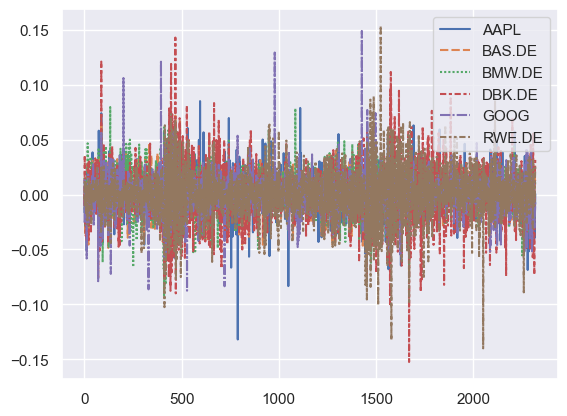

In [9]:
sns.lineplot(data = data);

In [10]:
np.mean(data.iloc[0])

-0.0053835731443470465

In [11]:
data.iloc[0]

AAPL     -0.016034
BAS.DE    0.006319
BMW.DE    0.015356
DBK.DE   -0.010512
GOOG     -0.025532
RWE.DE   -0.001899
Name: 0, dtype: float64

In [12]:
PF = data.mean(axis=1)

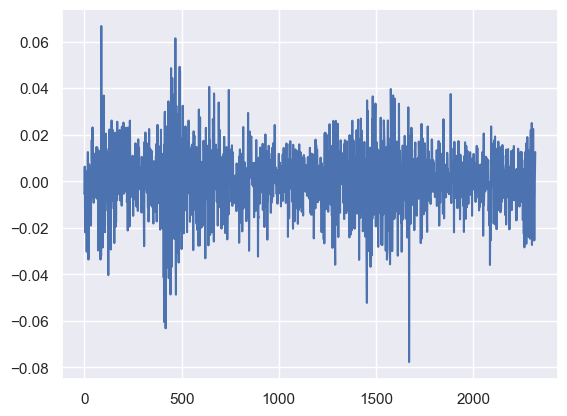

In [13]:
sns.lineplot(x = PF.index, y = PF);

# ARMA-GARCH

# Copula VaR

In [14]:
u = pv.to_pseudo_obs(data)

In [15]:
cop = pv.Vinecop(u)

In [16]:
cop.aic()

-4672.912571418864

In [17]:
cop.families

[[<BicopFamily.tll: 11>,
  <BicopFamily.tll: 11>,
  <BicopFamily.student: 2>,
  <BicopFamily.student: 2>,
  <BicopFamily.tll: 11>],
 [<BicopFamily.tll: 11>,
  <BicopFamily.tll: 11>,
  <BicopFamily.tll: 11>,
  <BicopFamily.tll: 11>],
 [<BicopFamily.tll: 11>, <BicopFamily.bb8: 10>, <BicopFamily.frank: 5>],
 [<BicopFamily.tll: 11>, <BicopFamily.gumbel: 4>],
 [<BicopFamily.joe: 6>]]

In [18]:
cop.structure

<pyvinecopulib.RVineStructure>
5 2 2 2 6 6 
2 4 4 6 2 
4 3 6 4 
3 6 3 
6 5 
1 

In [19]:
cop.simulate(100)

array([[5.35519832e-01, 9.06989225e-01, 8.79559005e-01, 8.60366149e-01,
        2.97111108e-01, 8.81654049e-01],
       [8.61657390e-01, 9.55722874e-01, 9.81277899e-01, 9.06379008e-01,
        6.21067794e-01, 3.39180975e-01],
       [5.46906961e-01, 5.15102727e-01, 8.31070639e-01, 9.58173355e-01,
        2.03213307e-01, 9.69399346e-01],
       [5.24379438e-01, 2.32002898e-02, 7.57782831e-02, 9.71964258e-02,
        4.94483060e-01, 9.59083042e-01],
       [6.07839411e-01, 9.32069757e-01, 5.84239606e-01, 9.80266253e-01,
        8.04361824e-01, 3.80424498e-01],
       [3.14230558e-01, 8.61026972e-01, 8.86714159e-01, 6.78226592e-01,
        2.94889554e-01, 9.47662166e-01],
       [6.18087678e-01, 7.09853912e-01, 6.44147879e-01, 8.56464719e-01,
        4.60501575e-01, 7.16957392e-01],
       [8.37136896e-01, 1.72029745e-01, 2.26311451e-01, 1.82236939e-01,
        5.11219400e-01, 8.19611726e-01],
       [3.81971127e-01, 5.26520843e-01, 5.68142662e-01, 6.25813940e-01,
        7.32304543e-01, 